<a href="https://colab.research.google.com/github/Bibitpamungkas/TugasBesar_MachineLearning/blob/kelompok/Tugas6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install kaggle

In [ ]:
%cd /content/gdrive/MyDrive/content/sample_data/

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/content/sample_data/'
/content


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/tmp/"

In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"bibitpamungkas","key":"0b4a500fd9a858ee152de296398002ab"}
import json
import zipfile
import os
with open('/tmp/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /tmp/kaggle.json

In [ ]:
!kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis

 99% 1.73G/1.74G [00:37<00:00, 40.8MB/s]
100% 1.74G/1.74G [00:37<00:00, 49.3MB/s]


In [ ]:
# Ekstrak dataset

import os
import zipfile

os.makedirs('/tmp/chest-xray-pneumoniacovid19tuberculosis')

local_zip = '/content/chest-xray-pneumoniacovid19tuberculosis.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/chest-xray-pneumoniacovid19tuberculosis')
zip_ref.close()

In [ ]:
# Definisikan path untuk data train dan data validation

import os
base_dir = '/tmp/chest-xray-pneumoniacovid19tuberculosis'
train = os.path.join(base_dir,'train')
validation = os.path.join(base_dir,'val')
test = os.path.join(base_dir,'test')

c19_tr = os.path.join(train,'COVID19')
c19_va = os.path.join(validation,'COVID19')
c19_ts = os.path.join(test,'COVID19')

nr_tr = os.path.join(train,'NORMAL')
nr_va = os.path.join(validation,'NORMAL')
nr_ts = os.path.join(test,'NORMAL')

pn_tr = os.path.join(train,'PNEUMONIA')
pn_va = os.path.join(validation,'PNEUMONIA')
pn_ts = os.path.join(test,'PNEUMONIA')

tb_tr = os.path.join(train,'TURBERCULOSIS')
tb_va = os.path.join(validation,'TURBERCULOSIS')
tb_ts = os.path.join(test,'TURBERCULOSIS')

#file training dan validation
file_train_c19 = os.listdir(c19_tr)
file_validation_c19 = os.listdir(c19_va)
file_test_c19 = os.listdir(c19_ts)
file_train_nr = os.listdir(nr_tr)
file_validation_nr = os.listdir(nr_va)
file_test_nr = os.listdir(nr_ts)
file_train_pn = os.listdir(pn_tr)
file_validation_pn = os.listdir(pn_va)
file_test_pn = os.listdir(pn_ts)
file_train_tb = os.listdir(tb_tr)
file_validation_tb = os.listdir(tb_va)
file_test_tb = os.listdir(tb_ts)

#Print jumlah data training dan validation
print("Data COVID19 Train : " + str(len(file_train_c19)))
print("Data COVID19 Validation : " + str(len(file_validation_c19)))
print("Data COVID19 Test : " + str(len(file_test_c19)))
print("Data NORMAL Train : " + str(len(file_train_nr)))
print("Data NORMAL Validation : " + str(len(file_validation_nr)))
print("Data NORMAL Test : " + str(len(file_test_nr)))
print("Data PNEUMONIA Train : " + str(len(file_train_pn)))
print("Data PNEUMONIA Validation : " + str(len(file_validation_pn)))
print("Data PNEUMONIA Test : " + str(len(file_test_pn)))
print("Data TURBERCULOSIS Train : " + str(len(file_train_tb)))
print("Data TURBERCULOSIS Validation : " + str(len(file_validation_tb)))
print("Data TURBERCULOSIS Test : " + str(len(file_test_tb)))

Data COVID19 Train : 460
Data COVID19 Validation : 10
Data COVID19 Test : 106
Data NORMAL Train : 1341
Data NORMAL Validation : 8
Data NORMAL Test : 234
Data PNEUMONIA Train : 3875
Data PNEUMONIA Validation : 8
Data PNEUMONIA Test : 390
Data TURBERCULOSIS Train : 650
Data TURBERCULOSIS Validation : 12
Data TURBERCULOSIS Test : 41


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(base_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
test_data = []
test_label = []
for r, d, f in os.walk(base_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

<h3>Data Preprocessing</h3>

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (576, 150, 150, 3)
Train Label =  (576,)
Test Data =  (576, 150, 150, 3)
Test Label =  (576,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [88 88 88]
Data setelah di-normalisasi  [0.34509805 0.34509805 0.34509805]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[1:5])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[1:5])

Label sebelum di-encoder  ['COVID19' 'COVID19' 'COVID19' 'COVID19']
Label setelah di-encoder  [0 0 0 0]


<h3>Definisikan Model</h3>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<h3>Training Model</h3>

In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
29/29 [==============================] - 32s 50ms/step - loss: 0.0220 - acc: 1.0000 - val_loss: 4.1573e-23 - val_acc: 1.0000
Epoch 2/100
29/29 [==============================] - 1s 30ms/step - loss: 7.7643e-25 - acc: 1.0000 - val_loss: 3.9423e-25 - val_acc: 1.0000
Epoch 3/100
29/29 [==============================] - 1s 33ms/step - loss: 3.1691e-25 - acc: 1.0000 - val_loss: 2.9246e-25 - val_acc: 1.0000
Epoch 4/100
29/29 [==============================] - 1s 30ms/step - loss: 2.8794e-25 - acc: 1.0000 - val_loss: 2.8753e-25 - val_acc: 1.0000
Epoch 5/100
29/29 [==============================] - 1s 30ms/step - loss: 2.8732e-25 - acc: 1.0000 - val_loss: 2.8730e-25 - val_acc: 1.0000
Epoch 6/100
29/29 [==============================] - 1s 30ms/step - loss: 2.8729e-25 - acc: 1.0000 - val_loss: 2.8729e-25 - val_acc: 1.0000
Epoch 7/100
29/29 [==============================] - 1s 30ms/step - loss: 2.8729e-25 - acc: 1.0000 - val_loss: 2.8729e-25 - val_acc: 1.0000
Epoch 8/100
29/29 [====

<h3>Evaluasi Model</h3>

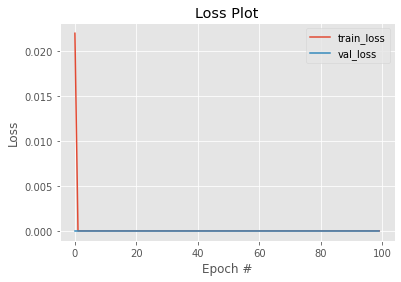

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

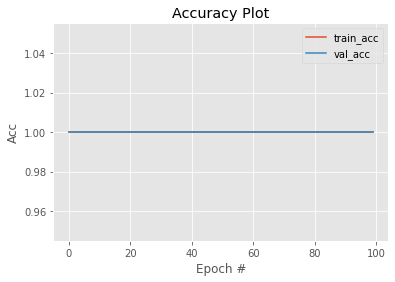

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       576

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [ ]:
import tensorflow as tf
model.save('model.h5')
new_model = tf.keras.models.load_model('model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [ ]:
plt.savefig("acc-1.svg")

<Figure size 432x288 with 0 Axes>